In [104]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

*** THIS NOTEBOOK CAN BE USED TO ANALYSE RAW WVF DATA FROM LARSOFT ***

In [105]:
def load_larsoft_root(wvf_type,path,root_folder):
    output = dict()
    if wvf_type == "RAW":
        output["PRETRIGGER"] = 0
        output["PEDESTAL"] = 1500
    elif wvf_type == "DEC":
        output["PRETRIGGER"] = 50
        output["PEDESTAL"] = 0
    else:
        output["PRETRIGGER"] = 0
        output["PEDESTAL"] = 0

    output["SAMPLING"] = 16e-9
    output["TRUE"] = dict()
    output["RECO"] = dict()
    
    raw = uproot.open(path)

    try:
        raw_ch = raw["digispe"]["PhotonData"]["photon_opCh"].array().to_numpy()[0]
        raw_npe = raw["digispe"]["PhotonData"]["photon_pulse"].array().to_numpy()[0]
        output["TRUE"]["CH"]  = np.asarray(raw_ch)    
        output["TRUE"]["PE"]  = np.asarray(raw_npe)
    except: 
        print("FILE DID NOT CONTAIN 'digispe' FOLDER")

    raw_wvf_list = raw[root_folder].keys()
    raw_wvfs = []
    raw_event = []
    raw_wvf_ch = []
    raw_wvf_npe = []

    for this_wvf in raw_wvf_list:
        wvf_info = this_wvf.split("_")
        wvf_info[5] = wvf_info[5].split(";")[0]
        raw_wvfs.append(raw[root_folder][this_wvf].to_numpy()[0])
        raw_event.append(int(wvf_info[1]))
        raw_wvf_ch.append(int(wvf_info[3]))
        raw_wvf_npe.append(int(wvf_info[5]))

   
    output["RECO"]["EV"]  = np.asarray(raw_event)    
    output["RECO"]["CH"]  = np.asarray(raw_wvf_ch)    
    output["RECO"]["PE"]  = np.asarray(raw_wvf_npe)    
    output["RECO"]["WVF"] = raw_wvfs    
    return output

In [106]:
raw = load_larsoft_root("RAW","../data/Larsoft/OpDetdigispe_hist.root","wavedigispe")
dec = load_larsoft_root("DEC","../data/Larsoft/deconv_reco_hist.root","opdecohana")

FILE DID NOT CONTAIN 'digispe' FOLDER


In [107]:
print("# NUMBER OF RECO WVFs: %i"%len(raw["RECO"]["WVF"]))
# plt.hist(raw["RECO"]["CH"], bins=np.max(raw["RECO"]["CH"]))
# plt.show()

# NUMBER OF RECO WVFs: 932


254


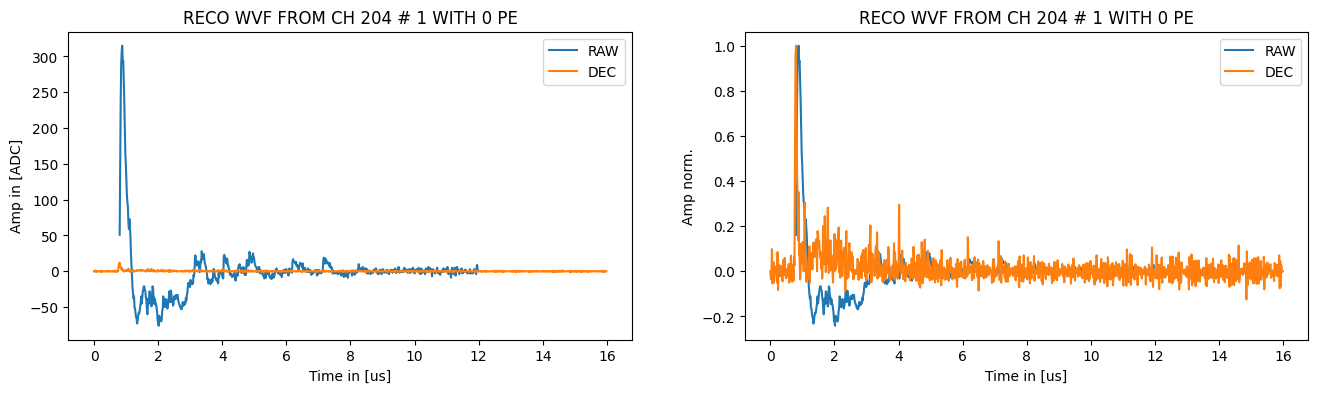

In [110]:
# num = np.random.randint(len(raw["RECO"]["WVF"])) # Activate for random wvf
ch = 204
ev = 1
num = np.where((raw["RECO"]["CH"] == ch) & (raw["RECO"]["EV"] == ev))[0][0]
print(num)

fig, ax = plt.subplots(1,2,figsize=(16,4))
ax[0].plot(raw["SAMPLING"]*1e6*(np.arange(len(raw["RECO"]["WVF"][num]))+dec["PRETRIGGER"]),raw["RECO"]["WVF"][num]-raw["PEDESTAL"],label="RAW")
ax[0].plot(dec["SAMPLING"]*1e6*np.arange(len(dec["RECO"]["WVF"][num])),dec["RECO"]["WVF"][num],label="DEC")
ax[0].set_ylabel("Amp in [ADC]")

ax[1].plot(raw["SAMPLING"]*1e6*(np.arange(len(raw["RECO"]["WVF"][num]))+dec["PRETRIGGER"]),(raw["RECO"]["WVF"][num]-raw["PEDESTAL"])/np.max(raw["RECO"]["WVF"][num]-raw["PEDESTAL"]),label="RAW")
ax[1].plot(dec["SAMPLING"]*1e6*np.arange(len(dec["RECO"]["WVF"][num])),(dec["RECO"]["WVF"][num])/np.max(dec["RECO"]["WVF"][num]),label="DEC")
ax[1].set_ylabel("Amp norm.")

for i in range(len(ax)):
    ax[i].set_title("RECO WVF FROM CH %i # %i WITH %i PE"%(raw["RECO"]["CH"][num],raw["RECO"]["EV"][num],raw["RECO"]["PE"][num]))
    ax[i].set_xlabel("Time in [us]");
    ax[i].legend()
plt.show()
